In [1]:
import pandas as pd
import statistics as st
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv('titanic-training-data.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Data Cleaning

In [7]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
#we have passenger id to get the details of who the person was so removing name from df
df.drop(['Name'],axis=1,inplace=True)

In [9]:
#pclass-> passenger class
#sibsp->  Number of Siblings/Spouses Aboard
#embarked-> where the traveler mounted from.
#parch-> of parents / children aboard the Titanic.

In [10]:
#cabin have almost high percentage of values as null or nan so dropping cabin
df.drop(['Cabin'],axis=1,inplace=True)

In [11]:
df.head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S


In [12]:
# df.isnull().sum()
#replacing nan with median because we are working with series of data which is numeric and have outliers.
df["Age"].replace(np.nan,np.median(df.dropna().Age),inplace=True)

In [13]:
# df.isnull().sum()
#replacing nan with mode because we are working with series of data which is object.
df["Embarked"].replace(np.nan,st.mode(df.dropna().Fare),inplace=True)

In [14]:
# df.isnull().sum()

# visualization

<Axes: xlabel='Survived', ylabel='count'>

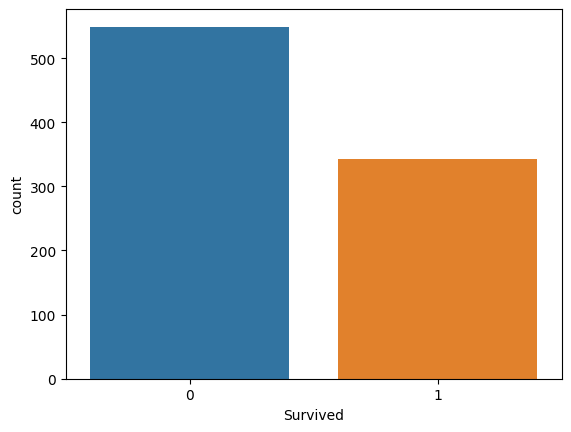

In [15]:
sns.countplot(x=df.Survived)

<Axes: xlabel='Survived', ylabel='count'>

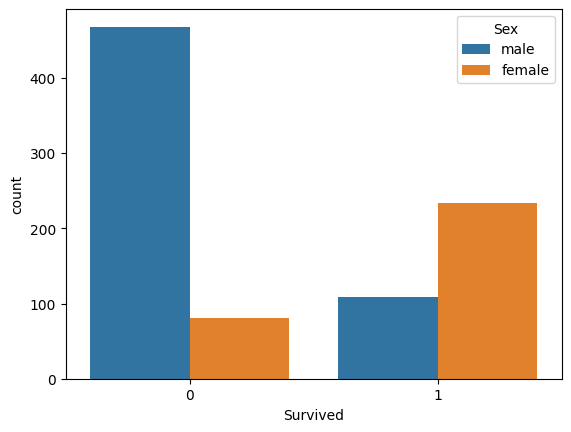

In [16]:
sns.countplot(x=df.Survived,hue=df.Sex)

In [17]:
# survived are more likely to be female.
# not survived are more likely to male.

<Axes: xlabel='Survived', ylabel='count'>

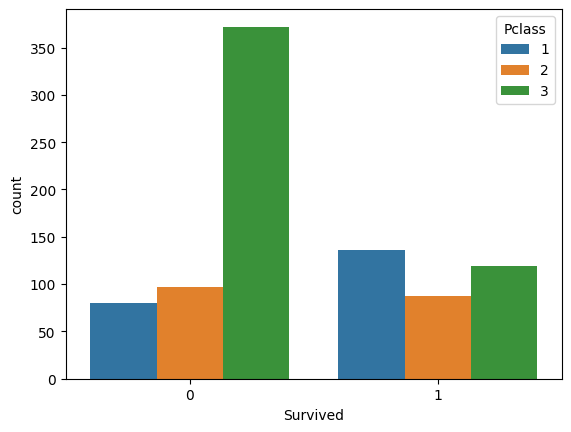

In [18]:
sns.countplot(x=df.Survived,hue=df.Pclass)

In [19]:
#passengers belonging to pclass 3 are more likely not survived.
#passengers belonging to pclass 1 are more likely be survived.

<Axes: xlabel='Survived', ylabel='count'>

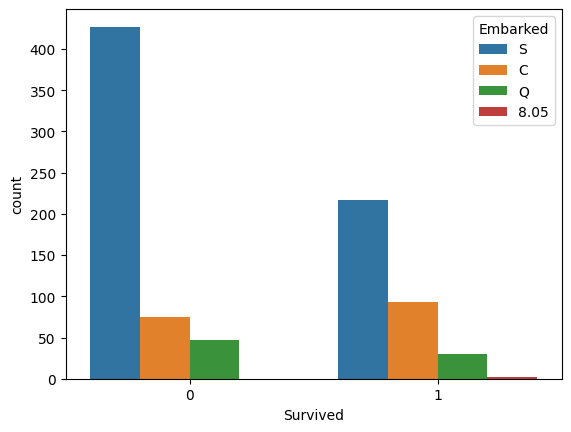

In [20]:
sns.countplot(x=df.Survived,hue=df.Embarked)

In [21]:
df.Embarked.unique()[3]

8.05

In [22]:
df["Embarked"].replace(df.Embarked.unique()[3],st.mode(df.dropna().Embarked),inplace=True)

<Axes: xlabel='Survived', ylabel='count'>

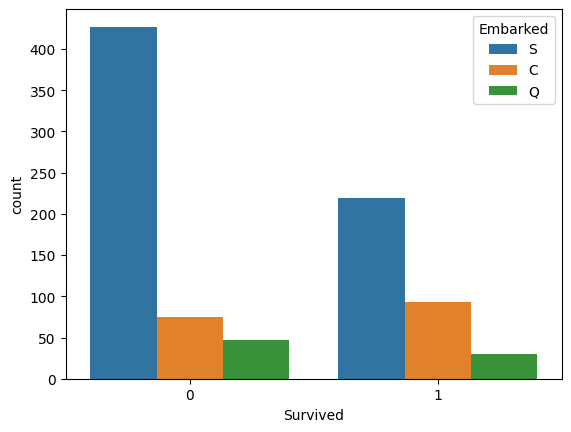

In [23]:
sns.countplot(x=df.Survived,hue=df.Embarked)

In [24]:
#passengers belonging to S are more likely not survived.

# Data Transformation

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


In [26]:
object_type_features=[]
for i in df:
    if df[i].dtype==object:
        object_type_features.append(i)

In [27]:
object_type_features

['Sex', 'Ticket', 'Embarked']

In [28]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
enc

LabelEncoder()

In [29]:
for i in object_type_features:
    df[i]=enc.fit_transform(df[i])

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int32  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    int32  
 8   Fare         891 non-null    float64
 9   Embarked     891 non-null    int32  
dtypes: float64(2), int32(3), int64(5)
memory usage: 59.3 KB


# From the observations fitting a model to predict target

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
reg1=LinearRegression()

In [33]:
from sklearn.model_selection import train_test_split as tts

In [34]:
X,x,Y,y=tts(df[['Survived']],df[['Sex','Pclass','Embarked']],test_size=0.05)

In [35]:
reg1.fit(X,Y)

LinearRegression()

In [36]:
p1=reg1.predict(x)
reg1.score(x,p1)*100

100.0